### 1

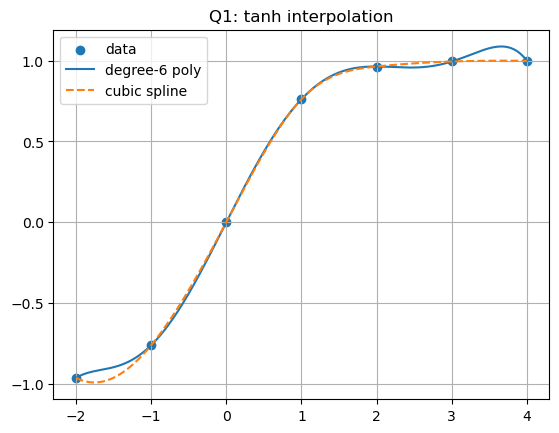

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy.interpolate import CubicSpline

# -------------------------------
# Q1: tanh data interpolation
# -------------------------------
t = np.arange(-2, 5)               # sample points -2, -1, ..., 4
y = np.tanh(t)

# global polynomial interpolant (degree 6)
poly_coeffs = np.polyfit(t, y, deg=len(t)-1)
poly = np.poly1d(poly_coeffs)

# cubic spline interpolant
cs_tanh = CubicSpline(t, y)

# dense grid for smooth curves
t_dense = np.linspace(t.min(), t.max(), 400)

# plot Q1
fig1, ax1 = plt.subplots()
ax1.scatter(t, y, label="data")
ax1.plot(t_dense, poly(t_dense), label="degree-6 poly")   # default color
ax1.plot(t_dense, cs_tanh(t_dense), linestyle="--", label="cubic spline")
ax1.set_title("Q1: tanh interpolation")
ax1.legend()
ax1.grid()
plt.show()

### 2

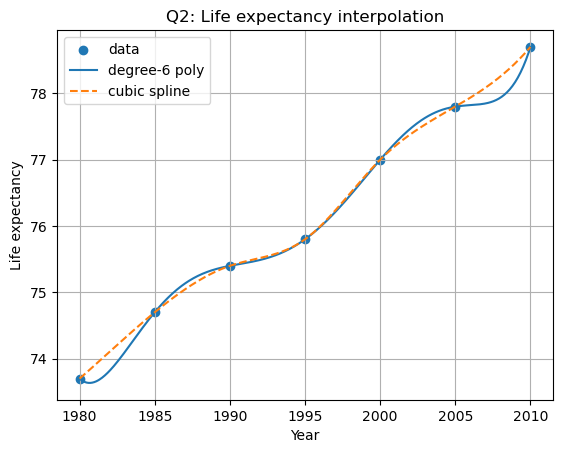

Life expectancy in 2007:
  - global polynomial: 77.8 years
  - cubic spline: 78.1 years


In [2]:
# -------------------------------
# Q2: U.S. life expectancy
# -------------------------------
years = np.array([1980, 1985, 1990, 1995, 2000, 2005, 2010])
life = np.array([73.7, 74.7, 75.4, 75.8, 77.0, 77.8, 78.7])
x = years - 1980                   # years since 1980

# global polynomial (degree 6)
poly2 = np.poly1d(np.polyfit(x, life, deg=len(x)-1))

# cubic spline
cs_life = CubicSpline(x, life)

# dense grid for plotting
x_dense = np.linspace(x.min(), x.max(), 500)

# estimate for 2007
year_query = 2007
xq = year_query - 1980  # xq: x query
life_poly_2007 = poly2(xq)
life_spline_2007 = cs_life(xq)

# plot Q2
fig2, ax2 = plt.subplots()
ax2.scatter(years, life, label="data")
ax2.plot(years[0] + x_dense, poly2(x_dense), label="degree-6 poly")
ax2.plot(years[0] + x_dense, cs_life(x_dense), linestyle="--", label="cubic spline")
ax2.set_xlabel("Year")
ax2.set_ylabel("Life expectancy")
ax2.set_title("Q2: Life expectancy interpolation")
ax2.legend()
ax2.grid()
plt.show()

# print numerical estimate for question 2(c)
life_poly_2007, life_spline_2007
print(f"Life expectancy in 2007:\n"
      f"  - global polynomial: {life_poly_2007:.1f} years\n"
      f"  - cubic spline: {life_spline_2007:.1f} years")

### 3

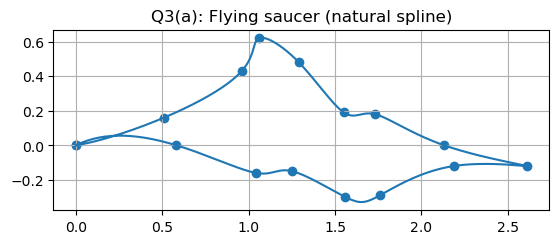

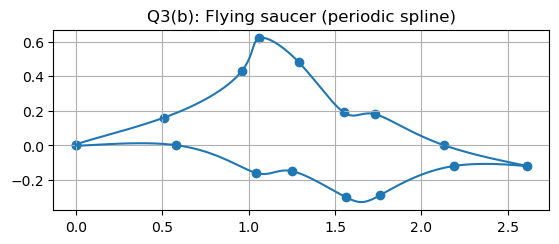

In [3]:
# -------------------------------
# Q3: Flying saucer shape
# -------------------------------
x_pts = np.array([
    0.0, 0.51, 0.96, 1.06, 1.29, 1.55, 1.73, 2.13, 2.61,
    2.19, 1.76, 1.56, 1.25, 1.04, 0.58, 0.0
])
y_pts = np.array([
    0.0, 0.16, 0.43, 0.62, 0.48, 0.19, 0.18, 0.0,
    -0.12, -0.12, -0.29, -0.30, -0.15, -0.16, 0.0, 0.0
])
s = np.arange(len(x_pts))

# natural cubic splines (default)
cs_x_nat = CubicSpline(s, x_pts)
cs_y_nat = CubicSpline(s, y_pts)

# periodic cubic splines
cs_x_per = CubicSpline(s, x_pts, bc_type='periodic')
cs_y_per = CubicSpline(s, y_pts, bc_type='periodic')

s_dense = np.linspace(s.min(), s.max(), 500)

# plot natural spline saucer
fig3, ax3 = plt.subplots()
ax3.plot(cs_x_nat(s_dense), cs_y_nat(s_dense))
ax3.scatter(x_pts, y_pts)
ax3.set_aspect('equal')
ax3.set_title("Q3(a): Flying saucer (natural spline)")
ax3.grid()
plt.show()

# plot periodic spline saucer
fig4, ax4 = plt.subplots()
ax4.plot(cs_x_per(s_dense), cs_y_per(s_dense))
ax4.scatter(x_pts, y_pts)
ax4.set_aspect('equal')
ax4.set_title("Q3(b): Flying saucer (periodic spline)")
ax4.grid()
plt.show()